# World Population Growth

In [1]:
import numpy
import pandas

%matplotlib inline
%config InlineBackend.figure_format = "retina"

import modsim


In [5]:
filename = "https://en.wikipedia.org/wiki/Estimates_of_historical_world_population"
tables = pandas.read_html(
    filename,
    header=0,
    index_col=0,
    decimal='M',
)

In [9]:
table2 = tables[2]

In [10]:
table2.head()

,United States Census Bureau (2017)[29],Population Reference Bureau (1973–2016)[15],United Nations Department of Economic and Social Affairs (2015)[16],Maddison (2008)[17],HYDE (2007)[25],Tanton (1994)[19],Biraben (1980)[20],McEvedy & Jones (1978)[21],Thomlinson (1975)[22],Durand (1974)[23],Clark (1967)[24]
Year,,,,,,,,,,,
1950,2557628654,2.516000e+09,2.525149e+09,2.544000e+09,2.527960e+09,2.400000e+09,2.527000e+09,2.500000e+09,2.400000e+09,NaN,2.486000e+09
1951,2594939877,NaN,2.572851e+09,2.571663e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1952,2636772306,NaN,2.619292e+09,2.617949e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1953,2682053389,NaN,2.665865e+09,2.665959e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1954,2730228104,NaN,2.713172e+09,2.716927e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
table2.columns = ['census', 'prb', 'un', 'maddison', 
                  'hyde', 'tanton', 'biraben', 'mj', 
                  'thomlinson', 'durand', 'clark']

In [14]:
census = table2.census / 1e9
census.tail()

Year
2012    7.013871
2013    7.092128
2014    7.169968
2015    7.247893
2016    7.325997
Name: census, dtype: float64

In [15]:
un = table2.un / 1e9
un.tail()

Year
2012    7.080072
2013    7.162119
2014    7.243784
2015    7.349472
2016         NaN
Name: un, dtype: float64

In [16]:
def plot_estimates():
    census.plot(style=':', label='US Census')
    un.plot(style='--', label='UN DESA')
    modsim.decorate(xlabel='Year', 
             ylabel='World population (billion)')

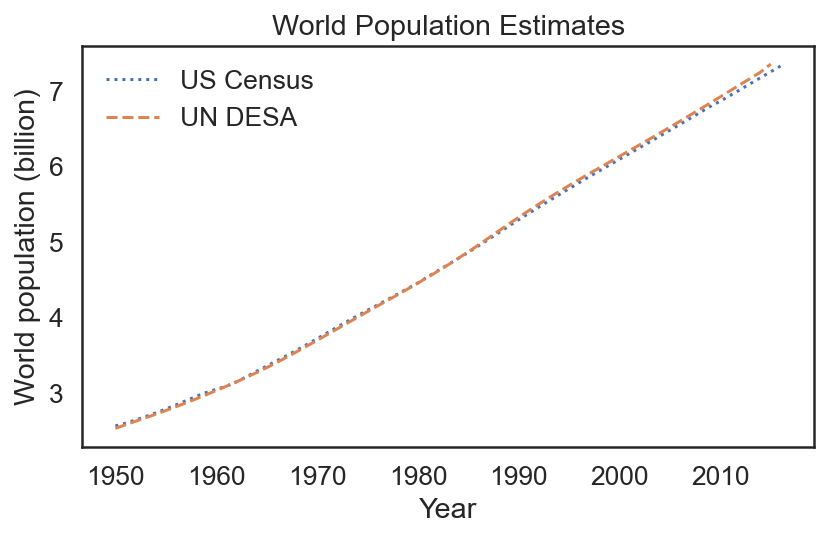

In [17]:
plot_estimates()
modsim.decorate(title='World Population Estimates')

In [19]:
# Absolute and Relative Errors
abs_error = numpy.abs(un - census)
abs_error.tail()

Year
2012    0.066201
2013    0.069991
2014    0.073816
2015    0.101579
2016         NaN
dtype: float64

In [21]:
abs_error.mean(), abs_error.max()

(0.029034508242424265, 0.10157921199999986)

In [26]:
# In general, if you think one estimate is better than the other, you put the better one in # the denominator. In this case, I don’t know which is better, so I put the smaller one in # the denominator, which makes the computed errors a little bigger.

rel_error = 100 * abs_error / census
rel_error.tail()

Year
2012    0.943860
2013    0.986888
2014    1.029514
2015    1.401500
2016         NaN
dtype: float64

In [23]:
rel_error.tail()*100

Year
2012     94.385969
2013     98.688770
2014    102.951384
2015    140.149993
2016           NaN
dtype: float64

In [25]:
rel_error.max(), rel_error.mean()

(1.4014999251669376, 0.5946585816022846)

In [27]:
census[1950]

2.557628654

In [28]:
total_growth = census[2016] - census[1950]
total_growth

4.768368055

In [29]:
t_0 = census.index[0]
t_0

1950

In [30]:
t_end = census.index[-1]
t_end

2016

In [31]:
elapsed_time = t_end - t_0
elapsed_time

66

In [32]:
p_0 = census[t_0]
p_end = census[t_end]
total_growth = p_end - p_0
total_growth

4.768368055

In [33]:
annual_growth = total_growth / elapsed_time
annual_growth # billion people per year, on average

0.07224800083333333

In [34]:
results = modsim.TimeSeries()

In [36]:
results[t_0] = p_0
results

,values
1950,2.557629


In [37]:
for t in range(t_0, t_end):
    results[t+1] = results[t] + annual_growth

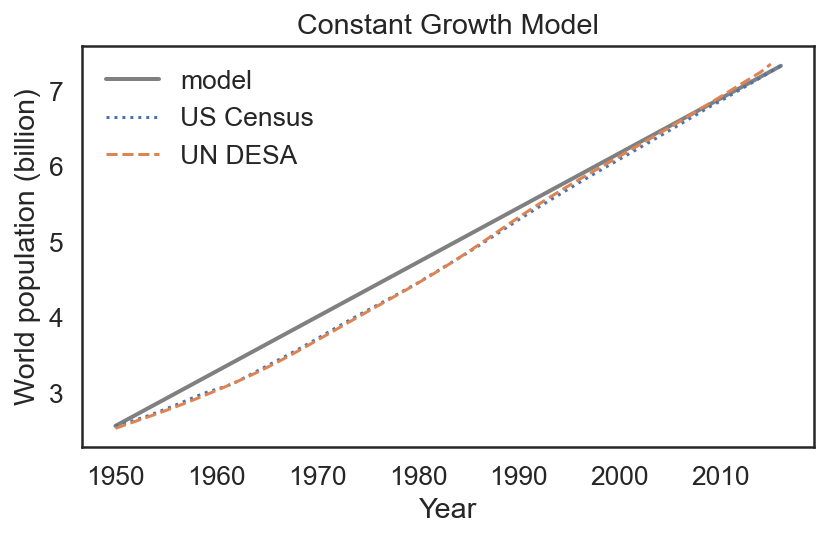

In [39]:
results.plot(color='gray', label='model')
plot_estimates()
modsim.decorate(title='Constant Growth Model')

### Exercise 1

Try fitting the model using data from 1970 to the present, and see if that does a better job.

Suggestions:

Define `t_1` to be 1970 and `p_1` to be the population in 1970. Use `t_1` and `p_1` to compute annual growth, but use `t_0` and `p_0` to run the simulation.

You might want to add a constant to the starting value to match the data better.

In [40]:
t_0 = census.index[0]
t_1 = 1970
t_end = census.index[-1]
elapsed_time = t_end - t_1

p_0 = census[t_0]
p_1 = census[t_1]
p_end = census[t_end]

total_growth = p_end - p_1
annual_growth = total_growth / elapsed_time
annual_growth

0.07854997754347826

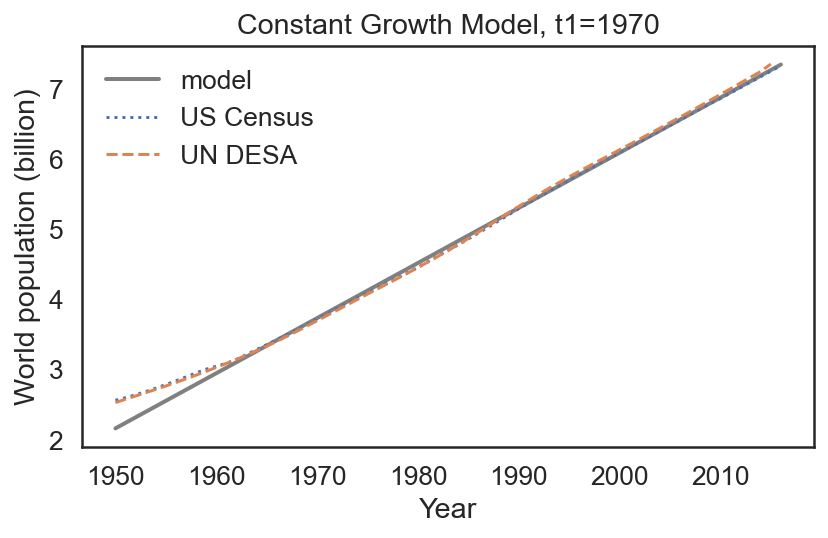

In [44]:
results = modsim.TimeSeries()
results[t_0] = p_0 - 0.4

for t in range(t_0, t_end):
    results[t+1] = results[t] + annual_growth

results.plot(color='gray', label='model')
plot_estimates()
modsim.decorate(title='Constant Growth Model, t1=1970')